### Step 1: Data Loading and Merging
I started by reading in all the necessary libraries and CSV files. The dataset included building metadata, weather information, and the main train and test files. After that, I merged the building and weather data with the training set based on the common columns betweeon them to create a unified dataset for further analysis.
Note: Merging the test set was not needed at this point

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
base_path = "/content/drive/MyDrive/Energy Prediction/"

building_metadata = pd.read_csv(base_path + "building_metadata.csv")
train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
weather_train = pd.read_csv(base_path + "weather_train.csv")
weather_test = pd.read_csv(base_path + "weather_test.csv")

In [ ]:
# To get an idea about each file's shape
for name, df in {
    "building_metadata": building_metadata,
    "train": train,
    "test": test,
    "weather_train": weather_train,
    "weather_test": weather_test}.items():
    print(f"{name}: {df.shape}")

building_metadata: (1449, 6)
train: (20216100, 4)
test: (41697600, 4)
weather_train: (139773, 9)
weather_test: (277243, 9)


In [ ]:
# Building_id is the common column between building_metadata and train file
train_merged= train.merge(building_metadata, on= "building_id", how="left")

# site_id and timestamp are the common columns between train_merged and weather_train
train_final=train_merged.merge(weather_train, on=["site_id","timestamp"], how="left")

### Step 2: Data Exploration and visualization
In this step, I explored the dataset to understand its structure, checked for missing values in columns, and used histograms to explore the distributions of variables.

In [ ]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   meter               int64  
 2   timestamp           object 
 3   meter_reading       float64
 4   site_id             int64  
 5   primary_use         object 
 6   square_feet         int64  
 7   year_built          float64
 8   floor_count         float64
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.4+ GB


In [ ]:
train_final. describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,7.992232e+00,1.077830e+05,1.968277e+03,4.184848e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,3.020815e+01,4.008277e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1.951000e+03,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1.969000e+03,3.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1.993000e+03,6.000000e+00,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


The histograms showed that some columns, like the target variable (meter_reading), were heavily skewed and there were some  noticeable spikes in some columns which may need further exploration to see if they are normal or not. Additionally, the feature scales were different across the columns:

array([[<Axes: title={'center': 'building_id'}>,
        <Axes: title={'center': 'meter'}>,
        <Axes: title={'center': 'meter_reading'}>,
        <Axes: title={'center': 'site_id'}>],
       [<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'floor_count'}>,
        <Axes: title={'center': 'air_temperature'}>],
       [<Axes: title={'center': 'cloud_coverage'}>,
        <Axes: title={'center': 'dew_temperature'}>,
        <Axes: title={'center': 'precip_depth_1_hr'}>,
        <Axes: title={'center': 'sea_level_pressure'}>],
       [<Axes: title={'center': 'wind_direction'}>,
        <Axes: title={'center': 'wind_speed'}>, <Axes: >, <Axes: >]],
      dtype=object)

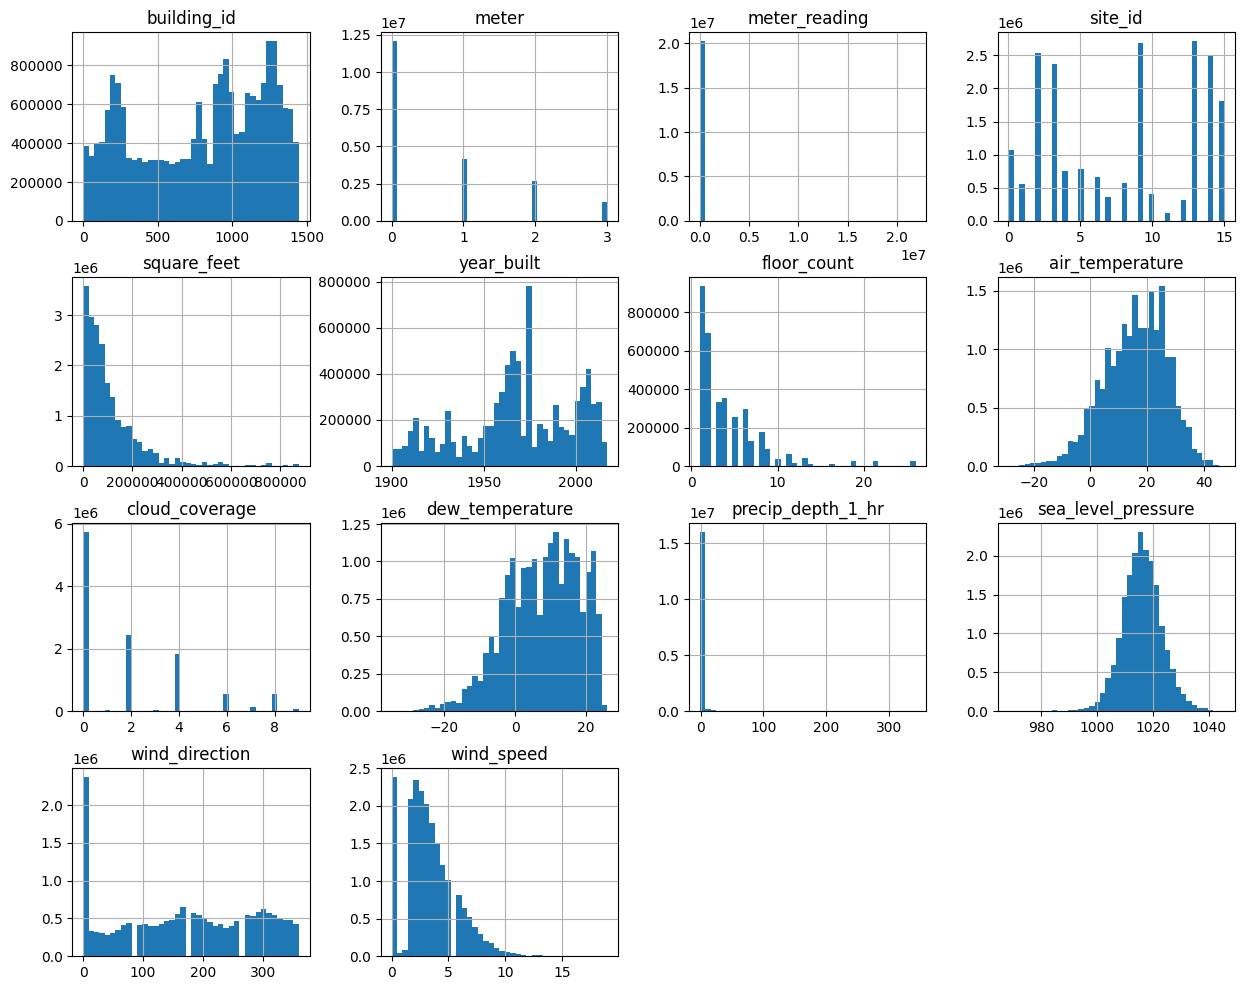

In [ ]:
train_final.hist(bins=40, figsize=(15,12))

In [ ]:
missing_ratio=train_final.isna().mean().sort_values(ascending=False)
missing_ratio.head(16)

,0
floor_count,0.826528
year_built,0.599900
cloud_coverage,0.436551
precip_depth_1_hr,0.185447
wind_direction,0.071678
sea_level_pressure,0.060925
wind_speed,0.007107
dew_temperature,0.004953
air_temperature,0.004781
square_feet,0.000000


### Step 3: Filling in the missing values

In [ ]:
# Dropped the floor_count variable since it had 82% missing values
train_final= train_final.drop("floor_count", axis=1)



* I checked the proportion of missing values in the year_built column for each site to identify whether any sites had 100% missing data. This helped in determining the best strategy for handling the missing values. For sites where year_built was completely missing, I filled the values using the global median.
For sites with only partial missingness, I used the median of that specific site to impute the missing values.



In [ ]:
train_final.groupby("site_id")["year_built"].apply(lambda x: x.isna().mean()).sort_values(ascending=False)

,year_built
site_id,
6,1.000000
14,1.000000
13,1.000000
12,1.000000
11,1.000000
10,1.000000
9,1.000000
8,1.000000
3,0.521850


In [ ]:
global_year_built_median=train_final["year_built"].median()

In [ ]:
site_year_built_medians=train_final.groupby("site_id")["year_built"].median()

In [ ]:

site_year_built_medians

,year_built
site_id,
0,2001.0
1,1960.0
2,1970.0
3,1961.0
4,1954.0
5,1976.0
6,NaN
7,1964.0
8,NaN


In [ ]:
site_year_built_medians=site_year_built_medians.fillna(global_year_built_median)

In [ ]:
site_year_built_medians

,year_built
site_id,
0,2001.0
1,1960.0
2,1970.0
3,1961.0
4,1954.0
5,1976.0
6,1969.0
7,1964.0
8,1969.0


In [ ]:
train_final["site_year_built_medians"]=train_final["site_id"].map(site_year_built_medians)

In [ ]:
train_final["year_built"]=train_final["year_built"].fillna(train_final["site_year_built_medians"])

In [ ]:

train_final=train_final.drop("site_year_built_medians", axis=1)

In [ ]:
# To check that there are no missing values left
train_final.groupby("site_id")["year_built"].apply(lambda x:x.isna().mean())

,year_built
site_id,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0


* Next, I examined the cloud_coverage column. Initially, I considered using IterativeImputer to fill in the missing values, but the correlations with other weather features were too weak. So for sites with partial missing values, I applied linear interpolation, and then used forward fill and backward fill for any remaining missing data. For sites where the data was completely missing, I used the global median:

In [ ]:
train_final.groupby("site_id")["cloud_coverage"].apply(lambda x:x.isna().mean())

,cloud_coverage
site_id,
0,0.434123
1,0.806355
2,0.268174
3,0.415033
4,0.480868
5,0.689777
6,0.340833
7,1.000000
8,0.441210


In [ ]:
weather_features = [
    "air_temperature",
    "dew_temperature",
    "sea_level_pressure",
    "wind_speed",
    "precip_depth_1_hr",
    "cloud_coverage"
]

corr=train_final[weather_features].corr()["cloud_coverage"]

In [ ]:
corr

,cloud_coverage
air_temperature,0.045196
dew_temperature,0.132972
sea_level_pressure,-0.148623
wind_speed,0.244121
precip_depth_1_hr,0.118936
cloud_coverage,1.000000


In [ ]:

# Sort the values based on site_id and timestamp for the ffill and bfill to work correctly
train_final=train_final.sort_values(["site_id","timestamp"])

In [ ]:
train_final["cloud_coverage"]=train_final.groupby("site_id")["cloud_coverage"].transform(lambda x: x.interpolate())
train_final["cloud_coverage"] = train_final.groupby("site_id")["cloud_coverage"].transform(lambda x: x.ffill().bfill())

In [ ]:
train_final["cloud_coverage"]=train_final["cloud_coverage"].fillna(train_final["cloud_coverage"].median())

* As for the precip_depth_1_hr column, I applied interpolation and ffill- bfill for sites with partial missing values and global median (0) for sities with 100% missing data:

In [ ]:
global_precip_median=train_final["precip_depth_1_hr"].median()

In [ ]:
train_final.groupby("site_id")["precip_depth_1_hr"].apply(lambda x:x.isna().mean())

,precip_depth_1_hr
site_id,
0,0.000096
1,1.000000
2,0.007616
3,0.004681
4,0.150679
5,1.000000
6,0.000216
7,0.916693
8,0.000120


In [ ]:
# To replace any negative precipitation values with NaN
train_final.loc[train_final["precip_depth_1_hr"]<0, "precip_depth_1_hr"]= np.nan

In [ ]:
# Interpolate within each site
train_final["precip_depth_1_hr"]=train_final.groupby("site_id")["precip_depth_1_hr"].transform(lambda x:x.interpolate())

# Forward fill and backward fill within each site
train_final["precip_depth_1_hr"]=train_final.groupby("site_id")["precip_depth_1_hr"].transform(lambda x: x.ffill().bfill())

In [ ]:
# Fill in the sites with 100% missing values
train_final["precip_depth_1_hr"]=train_final["precip_depth_1_hr"].fillna(global_precip_median)

In [ ]:
# To make sure there are no missing values left
train_final["precip_depth_1_hr"].isna().sum()

np.int64(0)

* The wind_direction column shows angles in degrees, which makes it tricky to use directly in models.So I decided to convert it into sine and cosine components. I learned about this method through research on circular features and found it effective for modeling wind direction.I then filled missing values in each site separately using interpolation, ffill and bfill. Finally, I used the global median if anything was still missing:


In [ ]:
train_final.groupby("site_id")["wind_direction"].apply(lambda x: x.isna().mean())

,wind_direction
site_id,
0,0.029025
1,0.002732
2,0.067378
3,0.017870
4,0.012046
5,0.036885
6,0.088743
7,0.019197
8,0.028591


In [ ]:
# Vertical component
train_final["wind_sin"] = np.sin(np.deg2rad(train_final["wind_direction"]))

# Horizental component
train_final["wind_cos"] = np.cos(np.deg2rad(train_final['wind_direction"]))

In [ ]:
# Interpolate missing values for sine and cosine separately
train_final["wind_sin"] = train_final.groupby("site_id")["wind_sin"].transform(lambda x: x.interpolate())
train_final["wind_cos"] = train_final.groupby("site_id")["wind_cos"].transform(lambda x: x.interpolate())

train_final["wind_sin"] = train_final.groupby("site_id")["wind_sin"].transform(lambda x: x.ffill().bfill())
train_final["wind_cos"] = train_final.groupby("site_id")["wind_cos"].transform(lambda x: x.ffill().bfill())

In [ ]:
# Fill any remaining nans with global median
train_final["wind_sin"] = train_final["wind_sin"].fillna(train_final["wind_sin"].median())
train_final["wind_cos"] = train_final["wind_cos"].fillna(train_final["wind_cos"].median())

In [ ]:
# Don't need wind_direction anymore
train_final=train_final.drop("wind_direction", axis=1)

* sea_level_pressure had about 6% missing data. The approach for this column was like cloud_coverage and precip_depth_1_hr. The only site with completely missing data was site 5:

In [ ]:
train_final.groupby("site_id")["sea_level_pressure"].apply(lambda x: x.isna().mean())

,sea_level_pressure
site_id,
0,0.009562
1,0.008311
2,0.005120
3,0.018424
4,0.008470
5,1.000000
6,0.019891
7,0.020113
8,0.009744


In [ ]:
train_final["sea_level_pressure"]=train_final.groupby("site_id")["sea_level_pressure"].transform(lambda x: x.interpolate())
train_final["sea_level_pressure"]=train_final.groupby("site_id")["sea_level_pressure"].transform(lambda x: x.ffill().bfill())

In [ ]:
# Filling in the missing values of the site with 100% missing data
global_slp_median=train_final["sea_level_pressure"].median()
train_final.loc[train_final["site_id"]==5, "sea_level_pressure"]=global_slp_median

In [ ]:
train_final["sea_level_pressure"].isna().sum()

np.int64(0)

* I used the same approach on wind_speed, dew_temperature and air_temperature. Additionally, since there was a noticeable spike at zero in wind_direction column, I checked whether those values were actually caused by calm weather or if they were sensor errors (for example, if 30–40% of the data was recorded as zero):

In [ ]:
train_final.groupby("site_id")["wind_speed"].apply(lambda  x:x.isna().mean())

,wind_speed
site_id,
0,0.000000
1,0.002391
2,0.000682
3,0.000914
4,0.000110
5,0.003643
6,0.004772
7,0.019197
8,0.000000


In [ ]:
train_final=train_final.sort_values(["site_id","timestamp"])

In [ ]:
train_final["wind_speed"]=train_final.groupby("site_id")["wind_speed"].transform(lambda x:x.interpolate())
train_final["wind_speed"]=train_final.groupby("site_id")["wind_speed"].transform(lambda x:x.ffill().bfill())

In [ ]:
# Check if the zero proportion is normal
zero_count = (train_final["wind_speed"] == 0).sum()
total_count = len(train_final)
print(f"Proportion of zero wind_speed: {zero_count/total_count:.2%}")

Proportion of zero wind_speed: 11.81%


In [ ]:
train_final.groupby("site_id")["dew_temperature"].apply(lambda  x:x.isna().mean())

,dew_temperature
site_id,
0,0.000287
1,0.002505
2,0.000227
3,0.001142
4,0.000340
5,0.003529
6,0.001390
7,0.021831
8,0.000364


In [ ]:
train_final["dew_temperature"] = train_final.groupby("site_id")["dew_temperature"].transform(lambda x: x.interpolate())
train_final["dew_temperature"] = train_final.groupby("site_id")["dew_temperature"].transform(lambda x: x.ffill().bfill())

In [ ]:

train_final.groupby("site_id")["air_temperature"].apply(lambda  x:x.isna().mean())

,air_temperature
site_id,
0,0.000287
1,0.002505
2,0.000227
3,0.000914
4,0.000110
5,0.003529
6,0.001390
7,0.019197
8,0.000364


In [ ]:
train_final["air_temperature"] = train_final.groupby("site_id")["air_temperature"].transform(lambda x: x.interpolate())
train_final["air_temperature"] = train_final.groupby("site_id")["air_temperature"].transform(lambda x: x.ffill().bfill())

In [ ]:
# To confirm there are no columns left with missing values
train_final.isna().mean()

,0
building_id,0.0
meter,0.0
timestamp,0.0
meter_reading,0.0
site_id,0.0
primary_use,0.0
square_feet,0.0
year_built,0.0
air_temperature,0.0
cloud_coverage,0.0


array([[<Axes: title={'center': 'building_id'}>,
        <Axes: title={'center': 'meter'}>,
        <Axes: title={'center': 'meter_reading'}>,
        <Axes: title={'center': 'site_id'}>],
       [<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'air_temperature'}>,
        <Axes: title={'center': 'cloud_coverage'}>],
       [<Axes: title={'center': 'dew_temperature'}>,
        <Axes: title={'center': 'precip_depth_1_hr'}>,
        <Axes: title={'center': 'sea_level_pressure'}>,
        <Axes: title={'center': 'wind_speed'}>],
       [<Axes: title={'center': 'wind_sin'}>,
        <Axes: title={'center': 'wind_cos'}>, <Axes: >, <Axes: >]],
      dtype=object)

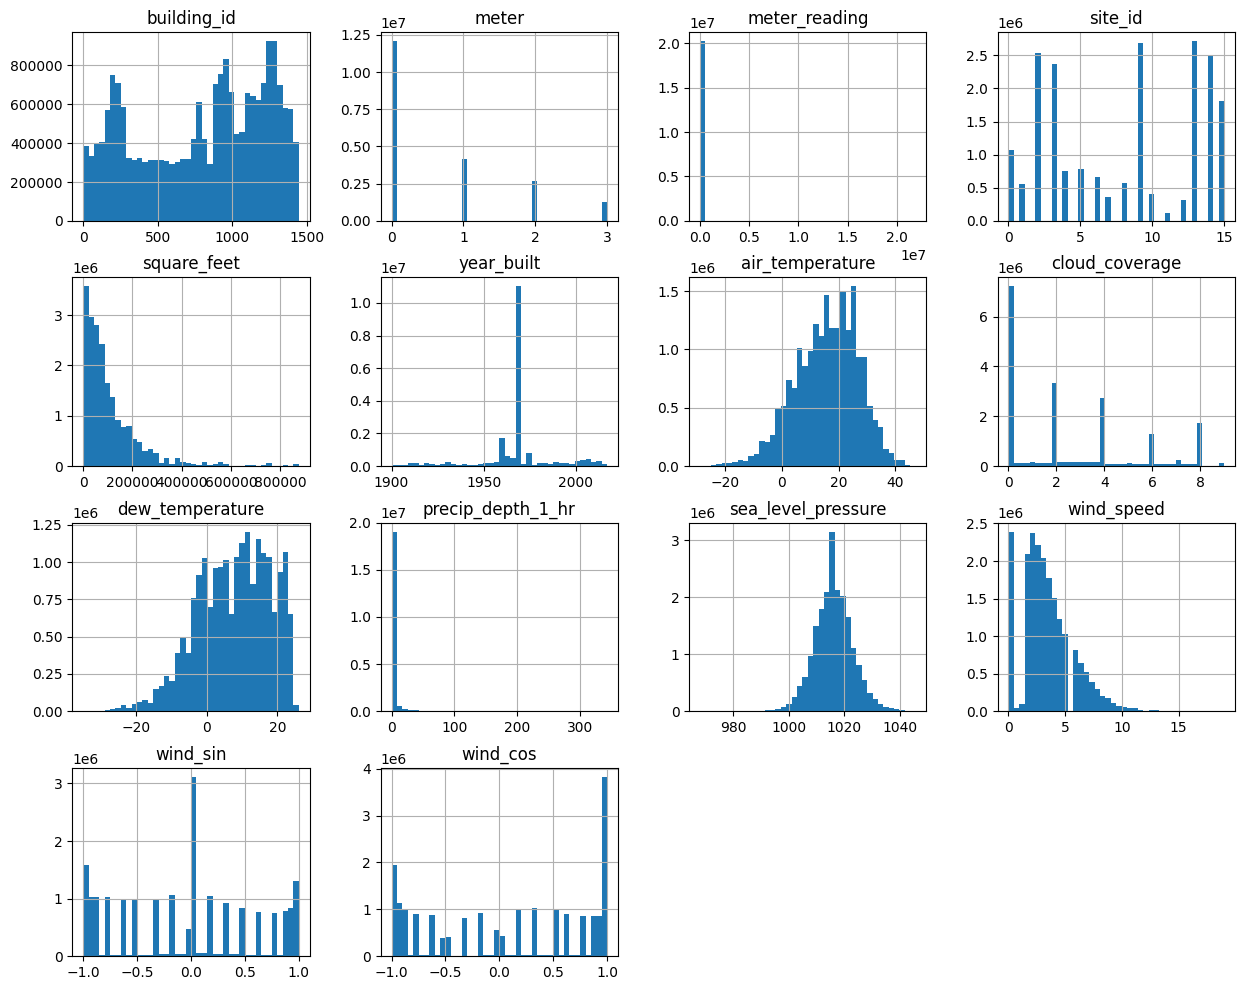

In [ ]:
# Check the visualization again after filling in the missing values
train_final.hist(bins=40, figsize=(15,12))

### Step 4: Feature Engineering

* I converted the timestamp column to a proper datetime format and created new time-based features, which can help the model learn daily and seasonal patterns in energy usage.Also since hour and month are cyclic, I encoded them with sine and cosine so the model can learn their circular patterns.

In [ ]:
train_final["timestamp"] = pd.to_datetime(train_final["timestamp"])
train_final["hour"] = train_final["timestamp"].dt.hour
train_final["dayofweek"] = train_final["timestamp"].dt.dayofweek
train_final["month"] = train_final["timestamp"].dt.month
train_final["is_weekend"]=(train_final["dayofweek"]>=5).astype(int)

In [ ]:
train_final["hour_sin"] = np.sin(2 * np.pi * train_final["hour"] / 24)
train_final["hour_cos"] = np.cos(2 * np.pi * train_final["hour"] / 24)

train_final["month_sin"] = np.sin(2 * np.pi * train_final["month"] / 12)
train_final["month_cos"] = np.cos(2 * np.pi * train_final["month"] / 12)

* Binned the year_built column into 5 categorical columns so that the model can capture the effect of building era on energy consumption

In [ ]:
train_final["year_built"].max()

2017.0

In [ ]:
train_final["year_built"].min()

1900.0

In [ ]:
# Create building_age_group
bins = [1900, 1950, 1980, 2000, 2011, 2018]
labels = ["Before1950", "1950-1979", "1980-1999", "2000-2010", "After2010"]
train_final["building_age_group"] = pd.cut(train_final["year_built"], bins=bins, labels=labels)

In [ ]:
train_final["building_age_group"] = train_final["building_age_group"].astype("category")

In [ ]:
train_final.groupby("site_id")["building_age_group"].apply(lambda x:x.isna().mean())

,building_age_group
site_id,
0,0.000000
1,0.047620
2,0.000000
3,0.011085
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000


In [ ]:
# To fill in the nans in building_age_group
train_final["building_age_group"] = train_final["building_age_group"].cat.add_categories(["Unknown"]) # Add unknown to the list of categories
train_final["building_age_group"] = train_final["building_age_group"].fillna("Unknown")

* Created some new weather features that may be informative for the model

In [ ]:
#To create a binary rain indicator
train_final["is_raining"]=(train_final["precip_depth_1_hr"]>0).astype(int)
train_final["is_raining"].value_counts(normalize=True)

,proportion
is_raining,
0,0.825989
1,0.174011


In [ ]:
# To capture cooling/heating effects in combination
train_final["air_temp_wind"] = train_final["air_temperature"] * train_final["wind_speed"]
# To captures the effect of cloudiness on temperature gain or loss
train_final["air_temp_cloud"] = train_final["air_temperature"] * train_final["cloud_coverage"]
# To help model humidity related cooling or heating effects.
train_final["dew_temp_wind"] = train_final["dew_temperature"] * train_final["wind_speed"]

In [ ]:
train_final.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_speed', 'wind_sin', 'wind_cos', 'hour',
       'dayofweek', 'month', 'is_weekend', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'building_age_group', 'is_raining', 'air_temp_wind',
       'air_temp_cloud', 'dew_temp_wind'],
      dtype='object')

After studying the data and doing some research, I decided to use tree-based models.Since these models can handle different feature scales quite well, I didn’t scale the data.
For the same reason, I also chose not to apply log1p to the skewed features.
I wasn’t entirely sure how to handle building_id, so I left it as it was to see how it might affect the model, although I was a bit concerned it could lead to overfitting. In addition, I decided to treat site_id as a categorical feature. I also tried 1 hour and 24 hour lag for wind and temperature. But they weren't really helpful.

### Step 5: Pre model setup

In [ ]:
features_to_drop = ["timestamp", "year_built","hour"]

In [ ]:
numeric_features = ["square_feet", "air_temperature", "dew_temperature", "cloud_coverage",
                    "precip_depth_1_hr", "sea_level_pressure", "wind_speed", "wind_sin", "wind_cos", "air_temp_wind", "air_temp_cloud",
                    "dew_temp_wind", "hour_sin","hour_cos", "dayofweek", "is_weekend", "is_raining","building_id",
                    "month_sin", "month_cos","month"]

In [ ]:
categorical_features = ["primary_use", "site_id", "meter", "building_age_group"]

In [ ]:
high_cardinality_features = ["building_id"]

target = "meter_reading"

In [ ]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20216100 entries, 0 to 20216099
Data columns (total 29 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         object        
 6   square_feet         int64         
 7   year_built          float64       
 8   air_temperature     float64       
 9   cloud_coverage      float64       
 10  dew_temperature     float64       
 11  precip_depth_1_hr   float64       
 12  sea_level_pressure  float64       
 13  wind_speed          float64       
 14  wind_sin            float64       
 15  wind_cos            float64       
 16  hour                int32         
 17  dayofweek           int32         
 18  month               int32         
 19  is_weekend          int64         
 20  hour_

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# To reduce memory usage
for col in train_final.select_dtypes(include=["float64"]).columns:
    train_final[col] = train_final[col].astype("float32")
for col in train_final.select_dtypes(include=["int64"]).columns:
    train_final[col] = train_final[col].astype("int32")

In [ ]:
X=train_final.drop(columns=[target]+features_to_drop)
y= train_final[target]

In [ ]:
X.columns

Index(['building_id', 'meter', 'site_id', 'primary_use', 'square_feet',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed', 'wind_sin',
       'wind_cos', 'dayofweek', 'month', 'is_weekend', 'hour_sin', 'hour_cos',
       'month_sin', 'month_cos', 'building_age_group', 'is_raining',
       'air_temp_wind', 'air_temp_cloud', 'dew_temp_wind'],
      dtype='object')

In [ ]:
# 15% stratified sample to avoid memory crash
X_sample, _, y_sample, _ = train_test_split(
    X, y,
    test_size=0.85,
    stratify=X["meter"],
    random_state=42
)

In [ ]:
# Split train-validation
X_train, X_val, y_train, y_val = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42
)

* I first used an OrdinalEncoder for the building_age_group feature, but after training the model, I found that switching to a OneHotEncoder slightly improved the performance.
Later, I found that OneHotEncoding the categorical features didn’t really improve results compared to leaving them as they were. Because of that, I decided not to encode categorical features in my final_model.ipynb notebook.

In [ ]:
!pip install -q lightgbm xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.2 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_log_error, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough")

* The target variable (meter_reading) is extremely skewed, which can make training harder and cause the model to focus too much on large values. I initially used log1p to reduce the skew. Later, after building the basic models and identifying the best algorithm and hyperparameters, I also tested a PowerTransformer (Yeo–Johnson) to see if it could further improve the RMSLE. The results were almost the same but slightly better with log1p, so I decided to continue using it for the final model.

In [ ]:
# Define a log transformer to apply log1p transformation to the target variable
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

### Step 6: Creating Base Models
I experimented with several tree-based models, including RandomForestRegressor, XGBoost, CatBoost, and LightGBM, and found that LightGBM and XGBoost performed the best. I chose tree-based models because they handle mixed numerical and categorical features well and are robust to outliers. They also don’t require heavy scaling, which makes preprocessing simpler. Tree-based models are generally a strong choice for tabular datasets like this one.

* LightGBM

In [ ]:
# Pipeline with preprocessing + LightGBM model (target transformed with log1p)
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", TransformedTargetRegressor(
        regressor=LGBMRegressor(
            n_jobs=1,
            random_state=42),
        transformer=log_transformer))
])

In [ ]:
# Search space for LightGBM hyperparameter tuning
param_distributions = {
    "model__regressor__num_leaves": [31, 50, 70, 100],
    "model__regressor__max_depth": [-1, 10, 20, 30],
    "model__regressor__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__regressor__n_estimators": [100, 300, 500],
    "model__regressor__min_child_samples": [10, 20, 50, 100]
}

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=2,
    n_jobs=3,
    random_state=42)

In [ ]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.422591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3252
[LightGBM] [Info] Number of data points in the train set: 2425932, number of used features: 63
[LightGBM] [Info] Start training from score 4.146986


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               'passthrough',
                                                                               ['square_feet',
                                                                                'air_temperature',
                                                                                'dew_temperature',
                                                                                'cloud_coverage',
                                                                                'precip_depth_1_hr',
                                                                                'sea_level_pressure',
                                                                                'wind_speed',
                                                                                'wind_sin',
                                                                                'wind_cos',
                                                                                'air_temp_wind',
                                                                                'air_temp_cloud',
                                                                                'dew_temp_wind',
                                                                                'hour_sin',
                                                                                'ho...
                                                                                                         validate=True)))]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'model__regressor__learning_rate': [0.01,
                                                                            0.05,
                                                                            0.1,
                                                                            0.2],
                                        'model__regressor__max_depth': [-1, 10,
                                                                        20,
                                                                        30],
                                        'model__regressor__min_child_samples': [10,
                                                                                20,
                                                                                50,
                                                                                100],
                                        'model__regressor__n_estimators': [100,
                                                                           300,
                                                                           500],
                                        'model__regressor__num_leaves': [31, 50,
                                                                         70,
                                                                         100]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
print("Best parameters found:", search.best_params_)

Best parameters found: {'model__regressor__num_leaves': 100, 'model__regressor__n_estimators': 300, 'model__regressor__min_child_samples': 100, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.2}


In [ ]:
best_lgb=search.best_estimator_

In [ ]:
y_pred = best_lgb.predict(X_val)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Calculate RMSLE on the validation set
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"RMSLE on validation set: {rmsle:.4f}")

RMSLE on validation set: 0.8199


In [ ]:
# This step was done to check if there was an overfitting by comparing train rmsle and validation rmsle

# Predict on both training and validation data
y_pred_train = best_lgb.predict(X_train)
y_pred_val = best_lgb.predict(X_val)

# Ensure predictions are non-negative (RMSLE requirement)
y_pred_train = np.maximum(y_pred_train, 0)
y_pred_val = np.maximum(y_pred_val, 0)

# Compute RMSLE for train and validation
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_pred_val))

# Print results
print(f"Train RMSLE: {rmsle_train:.4f}")
print(f"Validation RMSLE: {rmsle_val:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train RMSLE: 0.8047
Validation RMSLE: 0.8186


In [ ]:
# Access the inner LightGBM model inside the TransformedTargetRegressor
lgb_model = best_lgb.named_steps["model"].regressor_

# Get feature importances from the LightGBM model
importances = lgb_model.feature_importances_

# Get feature names from the preprocessor
feature_names = best_lgb.named_steps["preprocessor"].get_feature_names_out()

# Combine into a DataFrame for easy viewing
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(fi_df.head(20))

                                           feature  importance
0                                 num__square_feet        6922
17                                num__building_id        4996
1                             num__air_temperature        1668
53                                    cat__meter_0        1424
18                                  num__month_sin        1235
2                             num__dew_temperature        1041
54                                    cat__meter_1        1028
19                                  num__month_cos         982
13                                   num__hour_cos         966
20                                      num__month         911
55                                    cat__meter_2         648
12                                   num__hour_sin         621
5                          num__sea_level_pressure         588
14                                  num__dayofweek         559
56                                    cat__meter_3     

* XGBoost

In [ ]:
pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
     ("model", TransformedTargetRegressor(
        regressor=XGBRegressor(
            objective="reg:squarederror",
            random_state=42,
            n_jobs=1,
            tree_method="hist" ),
        transformer=log_transformer))
     ])

In [ ]:
# Define an RMSLE metric as a scorer for RandomizedSearchCV
def rmsle(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
xgb_param_dist = {
    "model__regressor__n_estimators": [200, 300, 400, 500, 800],
    "model__regressor__max_depth": [4, 6, 8, 10, 12],
    "model__regressor__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__regressor__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__regressor__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__regressor__min_child_weight": [1, 5, 10, 20],
    "model__regressor__gamma": [0, 0.1, 0.2, 0.3],
    "model__regressor__reg_alpha": [0, 0.01, 0.1, 1],
    "model__regressor__reg_lambda": [0.5, 1, 1.5, 2, 3]
}

In [ ]:
search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=xgb_param_dist,
    n_iter=30,
    scoring=rmsle_scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=3 )

In [ ]:
search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               'passthrough',
                                                                               ['square_feet',
                                                                                'air_temperature',
                                                                                'dew_temperature',
                                                                                'cloud_coverage',
                                                                                'precip_depth_1_hr',
                                                                                'sea_level_pressure',
                                                                                'wind_speed',
                                                                                'wind_sin',
                                                                                'wind_cos',
                                                                                'air_temp_wind',
                                                                                'air_temp_cloud',
                                                                                'dew_temp_wind',
                                                                                'hour_sin',
                                                                                'ho...
                                        'model__regressor__min_child_weight': [1,
                                                                               5,
                                                                               10,
                                                                               20],
                                        'model__regressor__n_estimators': [200,
                                                                           300,
                                                                           400,
                                                                           500,
                                                                           800],
                                        'model__regressor__reg_alpha': [0, 0.01,
                                                                        0.1,
                                                                        1],
                                        'model__regressor__reg_lambda': [0.5, 1,
                                                                         1.5, 2,
                                                                         3],
                                        'model__regressor__subsample': [0.6,
                                                                        0.7,
                                                                        0.8,
                                                                        0.9,
                                                                        1.0]},
                   random_state=42,
                   scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'),
                   verbose=2)

In [ ]:
print("Best parameters found:", search_xgb.best_params_)

Best parameters found: {'model__regressor__subsample': 0.8, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0.1, 'model__regressor__n_estimators': 300, 'model__regressor__min_child_weight': 1, 'model__regressor__max_depth': 12, 'model__regressor__learning_rate': 0.2, 'model__regressor__gamma': 0.2, 'model__regressor__colsample_bytree': 0.7}


In [ ]:
best_xgb=search_xgb.best_estimator_

In [ ]:
y_pred_xgb = best_xgb.predict(X_val)

In [ ]:
rmsle_xgb = np.sqrt(mean_squared_log_error(y_val, y_pred_xgb))
print(f"RMSLE on validation set: {rmsle_xgb:.4f}")

RMSLE on validation set: 0.6643


In [ ]:
y_pred_train = best_xgb.predict(X_train)
y_pred_val = best_xgb.predict(X_val)


y_pred_train = np.maximum(y_pred_train, 0)
y_pred_val = np.maximum(y_pred_val, 0)

rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_pred_val))

print(f"Train RMSLE: {rmsle_train:.4f}")
print(f"Validation RMSLE: {rmsle_val:.4f}")

Train RMSLE: 0.4686
Validation RMSLE: 0.6616


In [ ]:
xgb_model = best_xgb.named_steps["model"].regressor_

importances = xgb_model.feature_importances_

feature_names = best_xgb.named_steps["preprocessor"].get_feature_names_out()

fi_df_xgb = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(fi_df_xgb.head(20))

                                      feature  importance
37                             cat__site_id_0    0.087596
35                   cat__primary_use_Utility    0.074112
29                   cat__primary_use_Parking    0.053766
62            cat__building_age_group_Unknown    0.049535
50                            cat__site_id_13    0.034581
44                             cat__site_id_7    0.033837
41                             cat__site_id_4    0.032120
46                             cat__site_id_9    0.031390
42                             cat__site_id_5    0.029422
39                             cat__site_id_2    0.028829
36         cat__primary_use_Warehouse/storage    0.026206
31         cat__primary_use_Religious worship    0.025035
52                            cat__site_id_15    0.022508
43                             cat__site_id_6    0.021902
40                             cat__site_id_3    0.021635
47                            cat__site_id_10    0.020907
26  cat__prima

* RandomForestRegressor

In [ ]:
pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", TransformedTargetRegressor(
        regressor=RandomForestRegressor(
            random_state=42,
            n_jobs=-1
        ),
        transformer=log_transformer
    ))
])

In [ ]:
rf_param_dist = {
    "model__regressor__n_estimators": [50, 100, 200],
    "model__regressor__max_depth": [6, 8, 10],
    "model__regressor__min_samples_split": [2, 5],
    "model__regressor__min_samples_leaf": [1, 2],
    "model__regressor__max_features": ['sqrt', 0.3, 0.5],
    "model__regressor__bootstrap": [True, False]
}

In [ ]:
search_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=rf_param_dist,
    n_iter=10,
    scoring=rmsle_scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1
)

In [ ]:
search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.3, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 1.8min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.3, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 1.8min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.3, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 1.8min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 2.9min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 2.8min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 2.9min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=2, model__regressor__n_estimators=50; total time= 1.9min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=2, model__regressor__n_estimators=50; total time= 1.9min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=2, model__regressor__n_estimators=50; total time= 1.9min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=8, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 2.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=8, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 2.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=8, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time= 2.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=True, model__regressor__max_depth=6, model__regressor__max_features=0.3, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time=  54.0s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=True, model__regressor__max_depth=6, model__regressor__max_features=0.3, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time=  52.8s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=True, model__regressor__max_depth=6, model__regressor__max_features=0.3, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time=  52.5s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time=  32.7s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time=  32.7s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=5, model__regressor__n_estimators=50; total time=  31.8s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=200; total time= 2.9min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=200; total time= 2.9min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=200; total time= 3.0min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=True, model__regressor__max_depth=10, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 1.2min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=True, model__regressor__max_depth=10, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 1.2min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=True, model__regressor__max_depth=10, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 1.2min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 5.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 5.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=10, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 5.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 3.6min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 3.6min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bootstrap=False, model__regressor__max_depth=6, model__regressor__max_features=0.5, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=2, model__regressor__n_estimators=100; total time= 3.5min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               'passthrough',
                                                                               ['square_feet',
                                                                                'air_temperature',
                                                                                'dew_temperature',
                                                                                'cloud_coverage',
                                                                                'precip_depth_1_hr',
                                                                                'sea_level_pressure',
                                                                                'wind_speed',
                                                                                'wind_sin',
                                                                                'wind_cos',
                                                                                'air_temp_wind',
                                                                                'air_temp_cloud',
                                                                                'dew_temp_wind',
                                                                                'hour_sin',
                                                                                'ho...
                   param_distributions={'model__regressor__bootstrap': [True,
                                                                        False],
                                        'model__regressor__max_depth': [6, 8,
                                                                        10],
                                        'model__regressor__max_features': ['sqrt',
                                                                           0.3,
                                                                           0.5],
                                        'model__regressor__min_samples_leaf': [1,
                                                                               2],
                                        'model__regressor__min_samples_split': [2,
                                                                                5],
                                        'model__regressor__n_estimators': [50,
                                                                           100,
                                                                           200]},
                   random_state=42,
                   scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'),
                   verbose=2)

In [ ]:
best_rf = search_rf.best_estimator_
print("Best parameters:", search_rf.best_params_)

Best parameters: {'model__regressor__n_estimators': 100, 'model__regressor__min_samples_split': 2, 'model__regressor__min_samples_leaf': 1, 'model__regressor__max_features': 0.5, 'model__regressor__max_depth': 10, 'model__regressor__bootstrap': False}


In [ ]:
y_pred_train = best_rf.predict(X_train)
y_pred_val = best_rf.predict(X_val)

y_pred_train = np.maximum(y_pred_train, 0)
y_pred_val = np.maximum(y_pred_val, 0)

rmsle_train = rmsle(y_train, y_pred_train)
rmsle_val = rmsle(y_val, y_pred_val)

print(f"Train RMSLE: {rmsle_train:.4f}")
print(f"Validation RMSLE: {rmsle_val:.4f}")

Train RMSLE: 1.3098
Validation RMSLE: 1.3161


In [ ]:
rf_model = best_rf.named_steps["model"].regressor_

importances = rf_model.feature_importances_

feature_names = best_rf.named_steps["preprocessor"].get_feature_names_out()

fi_df_rf = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(fi_df_rf.head(20))

                                           feature  importance
0                                 num__square_feet    0.396337
17                                num__building_id    0.138179
1                             num__air_temperature    0.060182
55                                    cat__meter_2    0.040515
56                                    cat__meter_3    0.036461
54                                    cat__meter_1    0.034986
53                                    cat__meter_0    0.031766
2                             num__dew_temperature    0.029594
37                                  cat__site_id_0    0.026424
20                                      num__month    0.024627
18                                  num__month_sin    0.022513
51                                 cat__site_id_14    0.022001
42                                  cat__site_id_5    0.017111
50                                 cat__site_id_13    0.011019
46                                  cat__site_id_9    0

* CatBoostRegressor:

CatBoost can handle categorical features natively using its built-in encoding methods, so unlike the other models, I didn’t apply one-hot encoding here because the taining process would be really time consuming, and the model already works with raw categorical inputs.

In [ ]:
for col in categorical_features:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(str)
    if col in X_val.columns:
        X_val[col] = X_val[col].astype(str)

In [ ]:
cat_features_idx = [X_train.columns.get_loc(col) for col in categorical_features
                   if col in X_train.columns]

In [ ]:
pipe_cat = Pipeline([
    ("model", TransformedTargetRegressor(
        regressor=CatBoostRegressor(
            cat_features=cat_features_idx,
            loss_function="RMSE",
            random_seed=42,
            thread_count=-1,
            verbose=0
        ),
        transformer=log_transformer
    ))
])


In [ ]:
cat_param_dist = {
    "model__regressor__iterations": [300, 500, 700],
    "model__regressor__depth": [4, 6, 8],
    "model__regressor__learning_rate": [0.02, 0.05, 0.1],
    "model__regressor__l2_leaf_reg": [1, 3, 5, 7],
    "model__regressor__bagging_temperature": [0, 0.5, 1],
    "model__regressor__subsample": [0.7, 0.9, 1.0],
    "model__regressor__random_strength": [0, 1, 2],
    "model__regressor__border_count": [64, 128]
}

In [ ]:
search_cat = RandomizedSearchCV(
    estimator=pipe_cat,
    param_distributions=cat_param_dist,
    n_iter=10,
    scoring=rmsle_scorer,
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=1
)

In [ ]:
search_cat.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0, model__regressor__border_count=64, model__regressor__depth=8, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.1, model__regressor__random_strength=1, model__regressor__subsample=1.0; total time= 3.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0, model__regressor__border_count=64, model__regressor__depth=8, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.1, model__regressor__random_strength=1, model__regressor__subsample=1.0; total time= 3.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.05, model__regressor__random_strength=2, model__regressor__subsample=1.0; total time= 2.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.05, model__regressor__random_strength=2, model__regressor__subsample=1.0; total time= 2.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=300, model__regressor__l2_leaf_reg=3, model__regressor__learning_rate=0.05, model__regressor__random_strength=2, model__regressor__subsample=0.7; total time= 1.3min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=300, model__regressor__l2_leaf_reg=3, model__regressor__learning_rate=0.05, model__regressor__random_strength=2, model__regressor__subsample=0.7; total time= 1.3min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=300, model__regressor__l2_leaf_reg=1, model__regressor__learning_rate=0.02, model__regressor__random_strength=2, model__regressor__subsample=0.9; total time= 1.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=300, model__regressor__l2_leaf_reg=1, model__regressor__learning_rate=0.02, model__regressor__random_strength=2, model__regressor__subsample=0.9; total time= 1.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0.5, model__regressor__border_count=128, model__regressor__depth=8, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.1, model__regressor__random_strength=0, model__regressor__subsample=0.9; total time= 3.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0.5, model__regressor__border_count=128, model__regressor__depth=8, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.1, model__regressor__random_strength=0, model__regressor__subsample=0.9; total time= 3.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0.5, model__regressor__border_count=128, model__regressor__depth=4, model__regressor__iterations=500, model__regressor__l2_leaf_reg=5, model__regressor__learning_rate=0.05, model__regressor__random_strength=1, model__regressor__subsample=1.0; total time= 1.6min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0.5, model__regressor__border_count=128, model__regressor__depth=4, model__regressor__iterations=500, model__regressor__l2_leaf_reg=5, model__regressor__learning_rate=0.05, model__regressor__random_strength=1, model__regressor__subsample=1.0; total time= 1.6min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=8, model__regressor__iterations=700, model__regressor__l2_leaf_reg=1, model__regressor__learning_rate=0.05, model__regressor__random_strength=0, model__regressor__subsample=0.9; total time= 4.7min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=8, model__regressor__iterations=700, model__regressor__l2_leaf_reg=1, model__regressor__learning_rate=0.05, model__regressor__random_strength=0, model__regressor__subsample=0.9; total time= 4.7min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0, model__regressor__border_count=64, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=3, model__regressor__learning_rate=0.02, model__regressor__random_strength=2, model__regressor__subsample=0.9; total time= 2.2min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=0, model__regressor__border_count=64, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=3, model__regressor__learning_rate=0.02, model__regressor__random_strength=2, model__regressor__subsample=0.9; total time= 2.2min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=3, model__regressor__learning_rate=0.05, model__regressor__random_strength=2, model__regressor__subsample=0.7; total time= 2.2min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=128, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=3, model__regressor__learning_rate=0.05, model__regressor__random_strength=2, model__regressor__subsample=0.7; total time= 2.1min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=64, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.1, model__regressor__random_strength=2, model__regressor__subsample=0.9; total time= 2.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


[CV] END model__regressor__bagging_temperature=1, model__regressor__border_count=64, model__regressor__depth=6, model__regressor__iterations=500, model__regressor__l2_leaf_reg=7, model__regressor__learning_rate=0.1, model__regressor__random_strength=2, model__regressor__subsample=0.9; total time= 2.4min


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('model',
                                              TransformedTargetRegressor(regressor=<catboost.core.CatBoostRegressor object at 0x796c1bb7c680>,
                                                                         transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                         inverse_func=<ufunc 'expm1'>,
                                                                                                         validate=True)))]),
                   n_jobs=1,
                   param_distributions={'model__regressor__bagging_temperature': [0,
                                                                                  0.5,
                                                                                  1],
                                        'model__regressor__...
                                        'model__regressor__depth': [4, 6, 8],
                                        'model__regressor__iterations': [300,
                                                                         500,
                                                                         700],
                                        'model__regressor__l2_leaf_reg': [1, 3,
                                                                          5,
                                                                          7],
                                        'model__regressor__learning_rate': [0.02,
                                                                            0.05,
                                                                            0.1],
                                        'model__regressor__random_strength': [0,
                                                                              1,
                                                                              2],
                                        'model__regressor__subsample': [0.7,
                                                                        0.9,
                                                                        1.0]},
                   random_state=42,
                   scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'),
                   verbose=2)

In [ ]:
best_cat = search_cat.best_estimator_
print("Best Parameters:", search_cat.best_params_)

Best Parameters: {'model__regressor__subsample': 0.9, 'model__regressor__random_strength': 0, 'model__regressor__learning_rate': 0.1, 'model__regressor__l2_leaf_reg': 7, 'model__regressor__iterations': 500, 'model__regressor__depth': 8, 'model__regressor__border_count': 128, 'model__regressor__bagging_temperature': 0.5}


In [ ]:
y_pred_train = best_cat.predict(X_train)
y_pred_val = best_cat.predict(X_val)

y_pred_train = np.maximum(y_pred_train, 0)
y_pred_val = np.maximum(y_pred_val, 0)

rmsle_train = rmsle(y_train, y_pred_train)
rmsle_val = rmsle(y_val, y_pred_val)

print(f"Train RMSLE: {rmsle_train:.4f}")
print(f"Validation RMSLE: {rmsle_val:.4f}")

Train RMSLE: 1.0466
Validation RMSLE: 1.0521


In [ ]:
cat_model = best_cat.named_steps["model"].regressor_

importances = cat_model.feature_importances_
feature_names = cat_model.feature_names_

fi_df_cat = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(fi_df_cat.head(20))

               feature  importance
1                meter   23.562153
4          square_feet   23.167447
0          building_id   17.784647
2              site_id    8.433577
3          primary_use    7.481174
5      air_temperature    5.535748
14               month    4.451818
20  building_age_group    2.980012
18           month_sin    2.283453
19           month_cos    1.135471
7      dew_temperature    1.078423
17            hour_cos    0.770885
13           dayofweek    0.405911
16            hour_sin    0.268346
15          is_weekend    0.122862
12            wind_cos    0.119710
9   sea_level_pressure    0.110996
11            wind_sin    0.080403
24       dew_temp_wind    0.070206
6       cloud_coverage    0.061353


* Comparing log1p and PowerTransformer

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Best XGBoost hyperparameters found during tuning
best_params = {
    "n_estimators": 300,
    "max_depth": 12,
    "learning_rate": 0.2,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "min_child_weight": 1,
    "gamma": 0.2,
    "reg_lambda": 2,
    "reg_alpha" : 0.1
}

In [ ]:
# Create a pipeline using log-transformed target
pipe_log = Pipeline([("preprocessor", preprocessor)
, ("model", TransformedTargetRegressor(
    regressor= XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    **best_params),
    transformer=log_transformer
    ))
])

In [ ]:
# Create a pipeline using PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pipe_pt = Pipeline([("preprocessor", preprocessor),
 ("model", TransformedTargetRegressor(
     regressor= XGBRegressor(
         objective="reg:squarederror",
         random_state=42,
         n_jobs=-1,
         tree_method="hist",
         **best_params),
     transformer= pt
     ))
 ])

In [ ]:
# Set up 3 fold cross validation for model evaluation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
# Perform 3 fold cross validation to compare the performance of the log1p and PowerTransformer
scores_log = -cross_val_score(pipe_log, X_train, y_train, cv=kf, scoring=rmsle_scorer, n_jobs=-1)
scores_pt  = -cross_val_score(pipe_pt,  X_train, y_train, cv=kf, scoring=rmsle_scorer, n_jobs=-1)

In [ ]:
print(f"log1p RMSLE per fold: {scores_log}", f"mean: {scores_log.mean():.4f}")
print(f"yeo-johnson RMSLE per fold: {scores_pt}", f"mean: {scores_pt.mean():.4f}")

log1p RMSLE per fold: [0.68260265 0.68496075 0.6826133 ] mean: 0.6834
yeo-johnson RMSLE per fold: [0.68266447 0.68307369 0.68586109] mean: 0.6839


### Conclusion
I learned a lot while working through this notebook. Even though I was able to build a basic model, the results weren't strong enough, and I knew I needed to go deeper. That’s why I decided to start over and study the data more carefully before focusing on modeling again.

After reviewing feature importances across all four models I tested, I realized that building a single model for the entire dataset wouldn’t capture the differences between buildings. The feature importance patterns suggested that splitting the data by either site_id or meter could lead to better predictions. Due to time limitations, I only tested the site_id approach, and the improvement was noticeable, so I continued with that.

Based on the RMSLE scores from the basic models, it became clear that XGBoost and LightGBM were the strongest performers, so I chose to build separate models per site_id using these algorithms.

In the exploration_2 notebook, I take a deeper look at preprocessing, feature engineering, and building more refined models.